# 1- Problem statement

In this project we are trying to predict the home prices based on multiple parameters:
Independent variables:
1.	Area
2.	Bedrooms-Num
3.	Age

Dependant variable(feature)

 1.home_price


In [1]:
# firstly will call the basic libraries to load and discover the data set
#Import all important libraries 
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

__author__ = "Ahmad Shhadeh"
__email__ = "ashhadeh@yahoo.com"
__Date__ = "2019-06-29"

# 2 - Load & descover the dataSet


In [25]:
#read the test data using panda's function 
df=pd.read_csv("C:/Users/User/Desktop/DSDJ/Examples/External/SLR/homeprices.csv")
df



,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# 3 - Data reprocessing and cleaning  
#chcking the duplicate data, invalid data, nulls  or corrupt data ...etc 

In [50]:
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:

# From the above data, we noticed that there 3rd rows has "NaN" on bedroom column 
# for that we have to take action before we proceed as all ML linear models work only with numbers

#There are different ways to handle the empty/Null record, and all depend on our understanding of the data and the requirement 
#For example below some of actions can take:
#1- Drop the complete row
#2- Replaced with 0
#3- Replaced with mean/median or mood
#4- ...etc 
 
#In our case to make it simple we are going to calculate the median use instead of NULL


In [38]:
# to find the median for bedrooms
import math
median_bedrooms=df.bedrooms.median()

#to replace teh new value with NULL will use fillna function 
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
median_bedrooms



4.0

In [39]:
# the data set after reprocessing
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


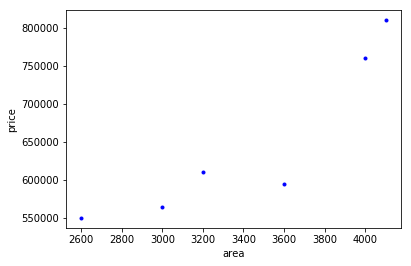

In [40]:
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='Blue',marker='.')




# 4- Model Creation 


In [44]:
# looking for the relation between the independent variable and dependant it seems simple and linear
# we are going to choose linear regression model

#Create linear regression object

reg=linear_model.LinearRegression()

reg.fit(df.drop('price',axis='columns'),df.price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# extar checking for the result 
# it is a linear regression relation and the standard equation for that is
Y = m * X + b (m is coefficient and b is intercept)


In [45]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [47]:
reg.intercept_


221323.00186540408

In [49]:
# runing the model
reg.predict (df.drop('price',axis='columns'))


array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

# Generate CSV file with list of home price predictions

In [12]:
area_df=pd.read_csv("C:/Users/User/Desktop/DSDJ/Examples/External/SLR/area.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [13]:
p=reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [15]:
area_df['price']=p

In [16]:
area_df

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("C:/Users/User/Desktop/DSDJ/Examples/External/SLR/price.csv")

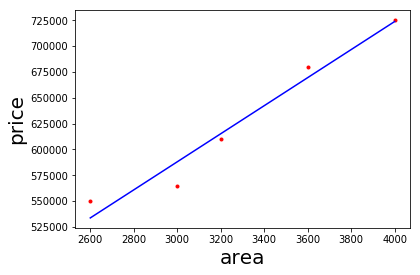

In [18]:

%matplotlib inline
plt.xlabel('area' ,fontsize=20)
plt.ylabel('price' ,fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='.')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')